In [1]:
# TODO: 데이터 읽어와서 관찰하기
import pandas as pd

wine = pd.read_csv("wine.csv")

In [2]:
wine.head()
# 1. 화이트 0. 레드

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [3]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [15]:
# TODO: 특성과 타깃, 훈련세트와 테스트 세트로 나누기
from sklearn.model_selection import train_test_split
wine_feature = wine[['alcohol','sugar','pH']]
wine_target = wine['class']

X_train, X_test, y_train, y_test = train_test_split(wine_feature, wine_target, test_size=0.2, random_state=42)

In [16]:
X_train.shape, X_test.shape

((5197, 3), (1300, 3))

In [17]:
# TODO: 표준화하기
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)

train_scaled =ss.transform(X_train)
test_scaled = ss.transform(X_test)

In [21]:
# TODO: 로지스틱 리그레션 적용하고 정확도 확인하기

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, y_train )

print(lr.score(train_scaled,y_train ))
print(lr.score(test_scaled, y_test))

0.7808350971714451
0.7776923076923077


In [ ]:
# 결정트리리

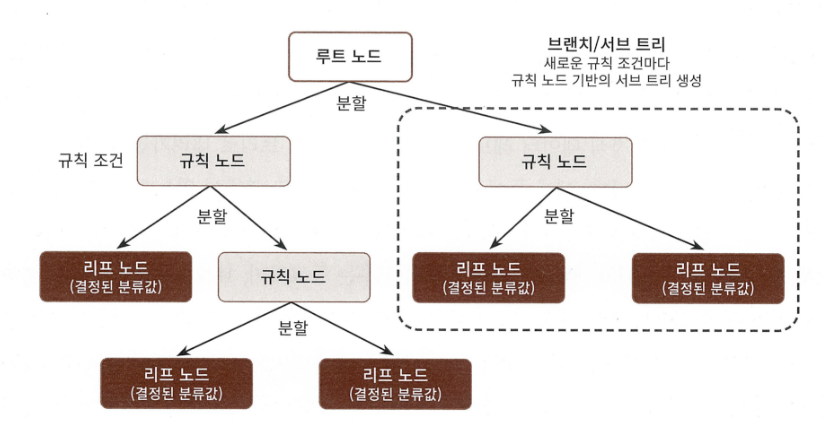

In [25]:
#TODO: 결정트리 적용하고 정확도 확인하기

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)

dt.fit(X_train, y_train)

print(dt.score(X_train,y_train ))
print(dt.score(X_test, y_test))

0.996921300750433
0.8584615384615385


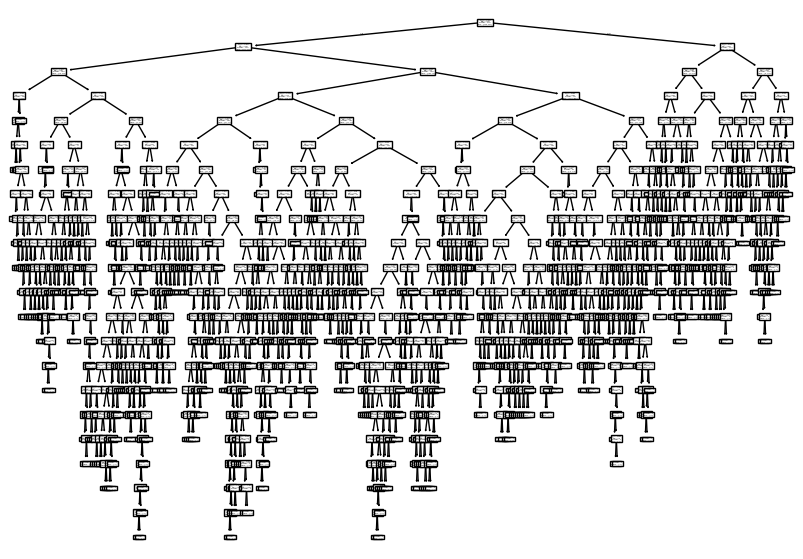

In [23]:
# TODO: # 결정트리를 그림으로 표현하기
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
# TODO:
plot_tree(dt)
plt.show()

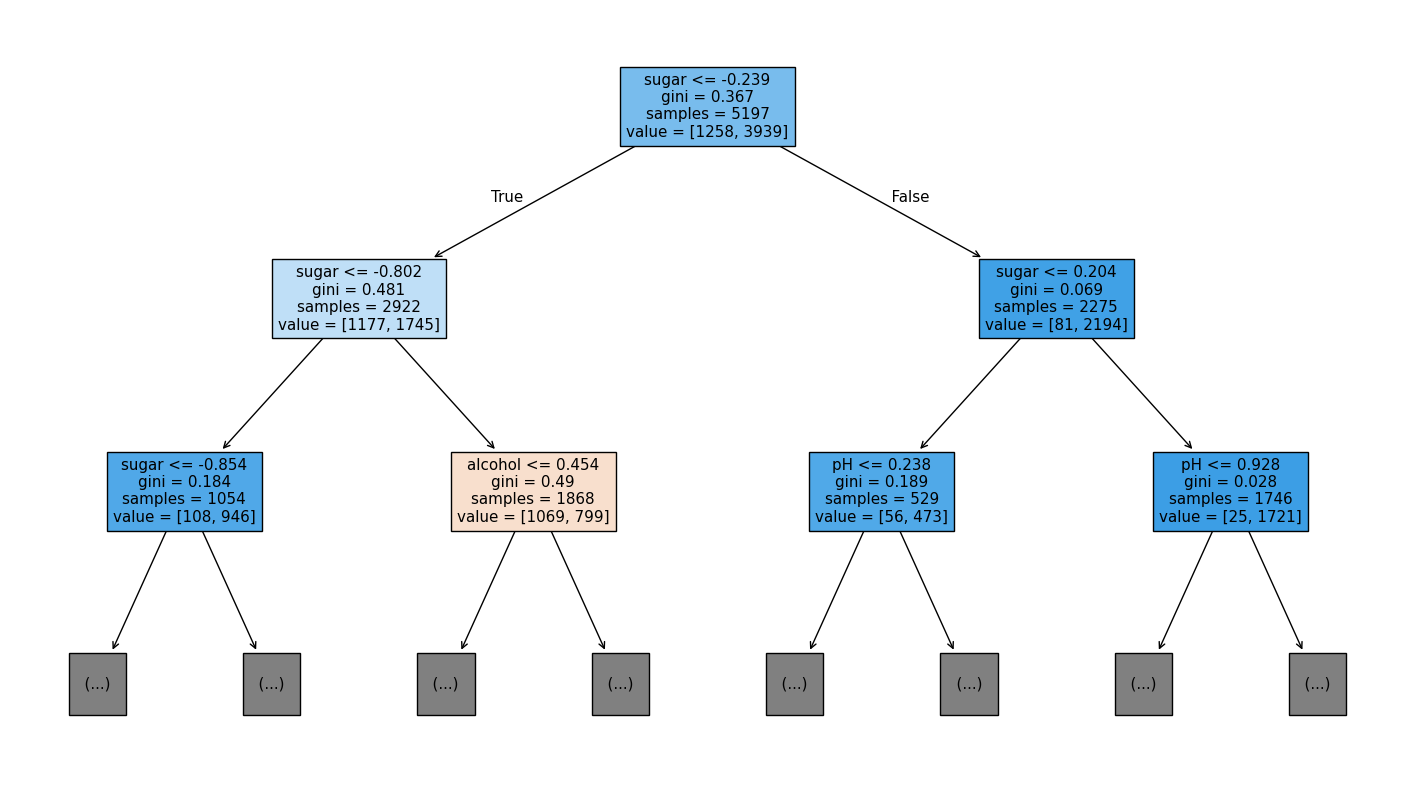

In [24]:
plt.figure(figsize=(18,10))
plot_tree(dt, max_depth=2, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [26]:
# TODO: 가지치기
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, y_train)

print(dt.score(train_scaled, y_train))
print(dt.score(test_scaled, y_test))

0.8454877814123533
0.8415384615384616


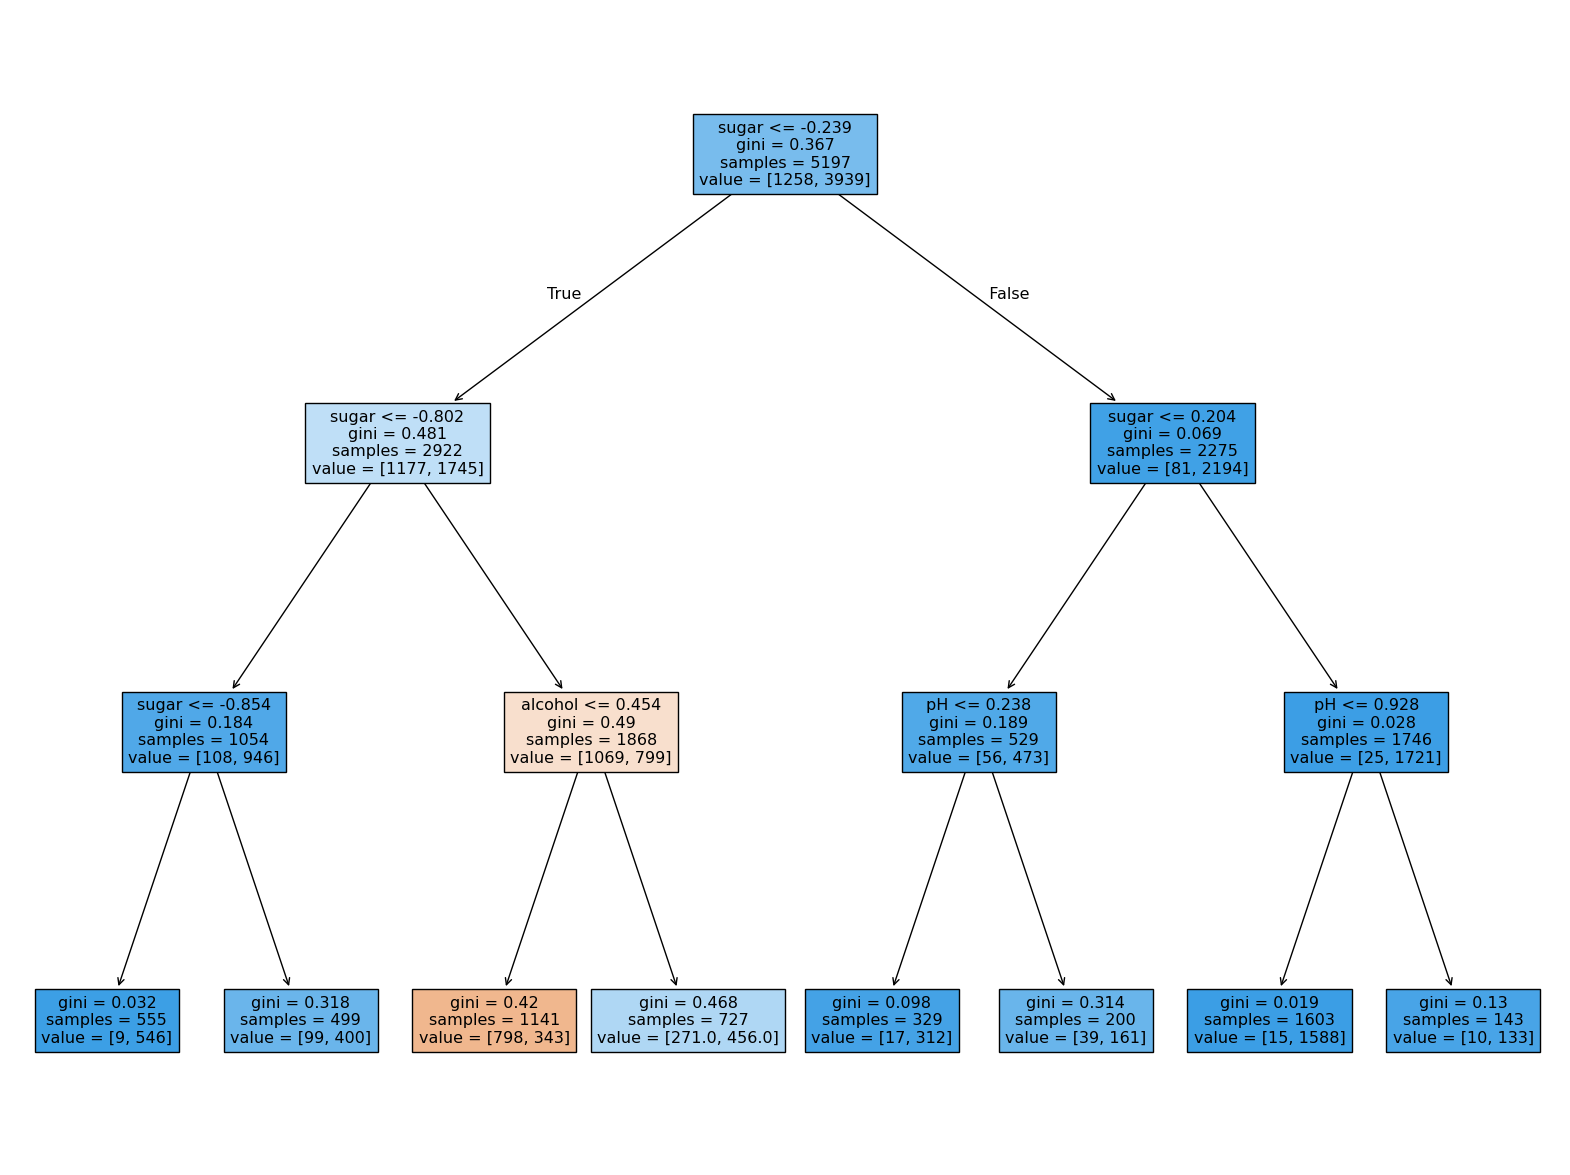

In [27]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [28]:
# TODO: 어떤 특성이 가장 유용한지 나타내는 특성 중요도를 계산

print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]
